# One hot encoding실습

In [1]:
import numpy as np

In [2]:
# 입력 문장 (모델 입력)
raw_inputs = [
             "나는 학생 입니다",
             "나는 좋은 선생님 입니다",
             "당신은 매우 좋은 선생님 입니다"
]

# 정답 학생(1) 기타(0)
raw_labels = [1, 0, 0]

In [3]:
words = []
for s in raw_inputs:
    words.extend(s.split())

In [4]:
print(words)

['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [5]:
# 중복 단어 제거
words = list(dict.fromkeys(words))

In [6]:
print(words)

['나는', '학생', '입니다', '좋은', '선생님', '당신은', '매우']


In [7]:
word_to_id = {"<PAD>":0,"<UNK>":1}
for w in words:
    word_to_id[w] = len(word_to_id)
print(word_to_id)

{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7, '매우': 8}


In [8]:
word_to_id.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('나는', 2), ('학생', 3), ('입니다', 4), ('좋은', 5), ('선생님', 6), ('당신은', 7), ('매우', 8)])

In [9]:
id_to_words = {i:w for w,i in word_to_id.items()}
print(id_to_words)

{0: '<PAD>', 1: '<UNK>', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}


In [10]:
train_inputs = []

# 문장마다 시퀸스 변환하는 과정
for s in raw_inputs:
    row = [word_to_id[w] for w in s.split()]

    # padding
    row += [0] * (5-len(row))
    train_inputs.append(row)

train_inputs = np.array(train_inputs)
print(train_inputs)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [11]:
train_inputs.shape

(3, 5)

In [12]:
# one-hot matrix 생성
onehot_matrix = np.eye(len(word_to_id)) # 단위행렬 생성
print(onehot_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [13]:
train_onehot = onehot_matrix[train_inputs]
print(train_onehot)

[[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


In [14]:
train_onehot.shape

(3, 5, 9)

In [15]:
print(np.argmax(train_onehot, axis=-1))

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [16]:
x = (np.argmax(train_onehot, axis=-1))
print(x)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [17]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [18]:
x_len = train_onehot.shape
print(x_len)

(3, 5, 9)


In [19]:
inp = tf.convert_to_tensor(x, dtype=tf.int32)
print(inp)

tf.Tensor(
[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]], shape=(3, 5), dtype=int32)


In [20]:
inp_len = tf.convert_to_tensor(x_len, dtype=tf.int32)
print(inp_len)

tf.Tensor([3 5 9], shape=(3,), dtype=int32)


In [21]:
vocab_size = 1000
dim = 3
embed = L.Embedding(vocab_size, dim)

In [22]:
embed(inp)

<tf.Tensor: shape=(3, 5, 3), dtype=float32, numpy=
array([[[-0.00800318, -0.02855622,  0.02950381],
        [ 0.00158304,  0.0274088 , -0.01638817],
        [ 0.01367557, -0.01286893, -0.03440173],
        [-0.01056675,  0.02716519, -0.0343533 ],
        [-0.01056675,  0.02716519, -0.0343533 ]],

       [[-0.00800318, -0.02855622,  0.02950381],
        [-0.04471196,  0.00796033,  0.00758058],
        [ 0.03836031,  0.01902537, -0.0423249 ],
        [ 0.01367557, -0.01286893, -0.03440173],
        [-0.01056675,  0.02716519, -0.0343533 ]],

       [[-0.02980256, -0.00643258,  0.02882986],
        [ 0.04222736, -0.01246612, -0.03175808],
        [-0.04471196,  0.00796033,  0.00758058],
        [ 0.03836031,  0.01902537, -0.0423249 ],
        [ 0.01367557, -0.01286893, -0.03440173]]], dtype=float32)>

# Word2vec

## abc 뉴스데이터로 word2vec

In [12]:
from nltk.corpus import abc
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
corpus = abc.sents()

In [25]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [26]:
print('코퍼스의 크기 :', len(corpus))

코퍼스의 크기 : 29059


In [27]:
from gensim.models import Word2Vec
model = Word2Vec(
    sentences=corpus,
    size=100,       # 워드 벡터의 특징 값, 임베딩된 벡터의 차원
    window=5,       # context window의 크기
    min_count=5,    # 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
    workers=4,      # 학습을 위한 프로세스 수
    sg=0            # 0은 CBOW, 1은 Skip-gram
)

In [28]:
# word2vec은 입력한 단어에 대해서 가장 유사한 단더들을 출력하는 model.wv.most_similar를 지원한다.
model_result = model.wv.most_similar("man") # 단어간 코사인 유사도(-1~1)를 계산하여 가장 1에 가까운 10개값을 반환

In [29]:
print(model_result)

[('woman', 0.9333978295326233), ('Bang', 0.9174728989601135), ('third', 0.9158248901367188), ('asteroid', 0.9144430756568909), ('skull', 0.91264408826828), ('rally', 0.9116621613502502), ('dinosaur', 0.9079714417457581), ('infant', 0.9038867950439453), ('dog', 0.9028000831604004), ('rich', 0.9007760286331177)]


In [30]:
from gensim.models import KeyedVectors

# 저장
model.wv.save_word2vec_format('./w2v')

In [31]:
loaded_model = KeyedVectors.load_word2vec_format("./w2v")
print('모델 load완료')

모델 load완료


In [32]:
loaded_model_result = loaded_model.wv.most_similar("man")
print(loaded_model_result)

[('woman', 0.9333978295326233), ('Bang', 0.9174728989601135), ('third', 0.9158248901367188), ('asteroid', 0.9144430756568909), ('skull', 0.91264408826828), ('rally', 0.9116621613502502), ('dinosaur', 0.9079714417457581), ('infant', 0.9038867950439453), ('dog', 0.9028000831604004), ('rich', 0.9007760286331177)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [33]:
loaded_model.most_similar('overacting')

KeyError: ignored

In [34]:
loaded_model.most_similar('memory')

[('jolt', 0.9711573719978333),
 ('structures', 0.970538854598999),
 ('lifting', 0.9705184102058411),
 ('infection', 0.9700412154197693),
 ('semen', 0.9700232148170471),
 ('video', 0.9682134389877319),
 ('charged', 0.9681147336959839),
 ('springs', 0.9677307605743408),
 ('movie', 0.9676814079284668),
 ('broad', 0.9674487709999084)]

## 한국어 word2vec 만들기

In [35]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 56.0 MB/s 


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [37]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f59d4bc7710>)

In [38]:
train_data = pd.read_table('ratings.txt')

In [39]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [41]:
# Null값이 존재하는 행 제거
droped_na_data = train_data.dropna(how='any')

In [43]:
print(len(droped_na_data))

199992


In [44]:
droped_na_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [47]:
cleaning_data = droped_na_data['document'].str.replace("[^ㅏ-ㅣㄱ-ㅎ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [48]:
cleaning_data[:5]

0                                  어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1    디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...
2                     폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고
3     와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지
4                           안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화
Name: document, dtype: object

In [49]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [50]:
# 불용어 제거 및 토큰화 적용
okt = Okt()
tokenized_data = []
for sentence in cleaning_data:
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if word not in stopwords] # 불용어 제거
    tokenized_data.append(temp_x)

print(tokenized_data[:5])

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고'], ['오다', '연기', '진짜', '개', '쩔다', '지루하다', '생각', '몰입', '보다', '그렇다', '이렇다', '진짜', '영화', '지'], ['안개', '자욱하다', '밤하늘', '뜨다', '있다', '초승달', '같다', '영화']]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


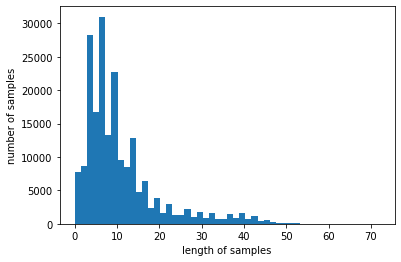

In [51]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [53]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [54]:
model.wv.vectors.shape

(16477, 100)

In [55]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8847265243530273), ('안성기', 0.8757756948471069), ('최민수', 0.8643490076065063), ('이민호', 0.8600115776062012), ('설경구', 0.8417963981628418), ('유다인', 0.8417581915855408), ('박상민', 0.8406884670257568), ('주진모', 0.8366653919219971), ('채민서', 0.8326462507247925), ('박중훈', 0.8235019445419312)]


In [56]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8658611178398132), ('무협', 0.8574554920196533), ('호러', 0.8539676666259766), ('느와르', 0.8425710201263428), ('정통', 0.8390511274337769), ('물의', 0.8377536535263062), ('물', 0.8375344276428223), ('무비', 0.8221415281295776), ('블록버스터', 0.822088897228241), ('멜로', 0.806597113609314)]


In [57]:
print(model.wv.most_similar("뽀로로"))

[('마다가스카', 0.8493053913116455), ('어린이날', 0.844731330871582), ('유로트립', 0.8257744312286377), ('바론', 0.8167880773544312), ('키키', 0.8157335519790649), ('에스', 0.8138102889060974), ('더파이팅', 0.8138045072555542), ('요괴', 0.8134110569953918), ('샵', 0.813277006149292), ('보다야', 0.8129746913909912)]


In [58]:
print(model.wv.most_similar("영화"))

[('애니메이션', 0.5851103067398071), ('독립영화', 0.5714597702026367), ('공포영화', 0.5697891116142273), ('애니', 0.563654899597168), ('이영화', 0.5479162931442261), ('작품', 0.5441969633102417), ('수작', 0.5300544500350952), ('다큐', 0.5300365686416626), ('영화로', 0.5189224481582642), ('액션영화', 0.5145867466926575)]


## 사전에 훈련된 워드 임베딩 (한국어)

In [61]:
import gensim
model = gensim.models.Word2Vec.load('./ko.bin')

In [62]:
print(model)

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [63]:
result = model.wv.most_similar("강아지", topn=50) # 상위 50개
print(result)

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.6750352382659912), ('아빠', 0.6729634404182434), ('목걸이', 0.6512460708618164), ('까마귀', 0.6500682830810547), ('아주머니', 0.6432187557220459), ('독사', 0.6389124393463135), ('고슴도치', 0.6313384771347046), ('거북이', 0.6252505779266357), ('돼지', 0.6222692131996155), ('앵무새', 0.6218831539154053), ('개구리', 0.6218565702438354), ('당나귀', 0.6206705570220947), ('송아지', 0.6165446043014526), ('구미호', 0.615827202796936), ('메두사', 0.6134721040725708), ('사냥개', 0.6131488084793091), ('악어', 0.6128274202346802), ('뱀파이어', 0.6126487255096436), ('맹수', 0.609540581703186), ('갈기', 0.6087672114372253), ('아저씨', 0.6054108142852783), ('바구니', 0.6049458980560303), ('샴푸', 0.6020784974098206), ('잠자리', 0.6012549996376038), ('요괴', 0.6010540127754211), ('기러기', 0.6004207134246826), ('아기', 0.6002471446990967), ('애완', 0.600007176399231

## 사전 훈련된 워드 임베딩 (영어)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/영우_6기_자연어/수업안/dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
print(model.vectors.shape)

(3000000, 300)


In [4]:
print(model.similarity('this','si'))

0.00068292255


In [5]:
print(model.similarity('post','book'))

0.057204384


In [6]:
print(model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [7]:
model.most_similar('memory')

[('Memory', 0.6844282150268555),
 ('memories', 0.6138081550598145),
 ('Added_Tarbet', 0.5560144186019897),
 ('Earliest_sporting', 0.5375796556472778),
 ('Flash_memory', 0.5318928360939026),
 ('foam_mattress_topper', 0.5253582000732422),
 ('flash_memory', 0.5221431255340576),
 ('remembering', 0.5171269178390503),
 ('SODIMM_modules', 0.5119421482086182),
 ('components_microprocessors_CPUs', 0.5007408857345581)]

In [8]:
del model

## FastText

- n = 3
- \<apple>
- \<ap, app, ppl, ple, le>

In [10]:
from gensim.models import FastText

In [15]:
model = FastText(corpus, size=100, window=5, min_count=5, workers=4, sg=1)

In [16]:
from gensim.models import Word2Vec
model_wv = Word2Vec(
    sentences=corpus,
    size=100,       # 워드 벡터의 특징 값, 임베딩된 벡터의 차원
    window=5,       # context window의 크기
    min_count=5,    # 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
    workers=4,      # 학습을 위한 프로세스 수
    sg=0            # 0은 CBOW, 1은 Skip-gram
)

In [17]:
model_wv.wv.most_similar('electrofishing') # Word2Vec

KeyError: ignored

In [18]:
model.wv.most_similar('electrofishing') # FastText

[('electric', 0.9571753740310669),
 ('electricity', 0.9374736547470093),
 ('electronics', 0.9305765628814697),
 ('electrical', 0.9268018007278442),
 ('trick', 0.9201295375823975),
 ('tactics', 0.9178457856178284),
 ('Systems', 0.9159002900123596),
 ('electronic', 0.915211021900177),
 ('electrode', 0.9140057563781738),
 ('ironic', 0.9124502539634705)]

## GloVe

In [21]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 10.6 MB/s 


In [22]:
from glove import Corpus, Glove

In [26]:
corpus_model = Corpus()

In [27]:
corpus_model.fit(corpus)

In [28]:
glove = Glove(no_components=100, learning_rate=0.05)

In [34]:
glove.fit(corpus_model.matrix, epochs=10, no_threads=4, verbose=True)
glove.add_dictionary(corpus_model.dictionary)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [35]:
print(glove.most_similar("man"))

[('child', 0.9733152249783119), ('woman', 0.9588288938341321), ('real', 0.958245471901264), ('dog', 0.9515154084006352)]


In [36]:
print(glove.most_similar("boy"))

[('Should', 0.9814941553477474), ('Carbon', 0.980947821075289), ('planetesimals', 0.9805143578859857), ('transitional', 0.9801229761307558)]


In [37]:
print(glove.most_similar("university"))

[('moon', 0.975153617171653), ('state', 0.9680538994376868), ('peak', 0.9658155262646219), ('world', 0.9587860971755249)]
